In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dem_candidates = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/primary-candidates-2018/dem_candidates.csv')
rep_candidates = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/primary-candidates-2018/rep_candidates.csv', encoding='MacRoman')

# EDA

In [2]:
rep_candidates.columns, dem_candidates.columns

(Index(['Candidate', 'State', 'District', 'Office Type', 'Race Type',
        'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
        'General Status', 'Primary %', 'Won Primary', 'Rep Party Support?',
        'Trump Endorsed?', 'Bannon Endorsed?', 'Great America Endorsed?',
        'NRA Endorsed?', 'Right to Life Endorsed?',
        'Susan B. Anthony Endorsed?', 'Club for Growth Endorsed?',
        'Koch Support?', 'House Freedom Support?', 'Tea Party Endorsed?',
        'Main Street Endorsed?', 'Chamber Endorsed?', 'No Labels Support?'],
       dtype='object'),
 Index(['Candidate', 'State', 'District', 'Office Type', 'Race Type',
        'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
        'General Status', 'Partisan Lean', 'Primary %', 'Won Primary', 'Race',
        'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?',
        'Obama Alum?', 'Party Support?', 'Emily Endorsed?',
        'Guns Sense Candidate?', 'Biden

In [3]:
print(dem_candidates[['Biden Endorsed?']].value_counts())
print('\n')
print(dem_candidates[['Sanders Endorsed?']].value_counts())
print('\n')
print(dem_candidates[['Emily Endorsed?']].value_counts())
print('\n')
print(dem_candidates[['Warren Endorsed? ']].value_counts())
print('\n')
print(dem_candidates[['WFP Endorsed?']].value_counts())

Biden Endorsed?
No                 29
Yes                10
dtype: int64


Sanders Endorsed?
No                   20
Yes                   9
dtype: int64


Emily Endorsed?
No                 174
Yes                 54
dtype: int64


Warren Endorsed? 
No                   21
Yes                   5
dtype: int64


WFP Endorsed?
No               74
Yes              30
dtype: int64


### Numerical Visualization 1: Distribution of Partisan Lean Split on Race


Text(0.5, 1.0, 'Distribution of Partisan Lean Split on Race')

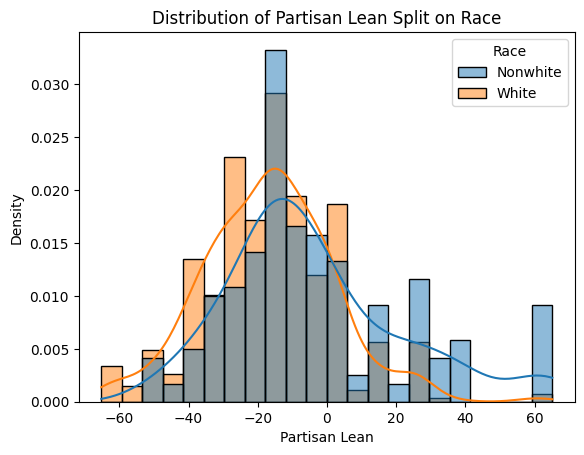

In [4]:
sns.histplot(data=dem_candidates, x='Partisan Lean', hue='Race', stat='density', common_norm=False, kde=True)
plt.title('Distribution of Partisan Lean Split on Race')




 We observe that there may be some discrepencies in the tails in that there is a spike in nonwhite in the larger partisan lean areas, implying that nonwhite people may be more likely to run in more democrat leaning areas. On the other hand, in the left tail, there appears to be a higher concentration of whites in the lower partisan leans, implying that whites may be more likely to run in more conservative areas. This could also be due to the demographics of counties, possibly suggesting that there there may be more whites in conservative leaning areas and nonwhites in democrat leaning areas. This visualization is relevant to our research question regarding if race has an effect on a democrat winning a primary in that it suggests a possible answer to the question. This graph suggests that there may be no effect of race in whether a democrat wins a primary **in general**, but that there may be differences based on the partisan lean of the area they run in.

### Numerical Visualization 2: Distribution of Primary Percentage Split on Race

Text(0.5, 1.0, 'Distribution of Primary Percentage Split on Race')

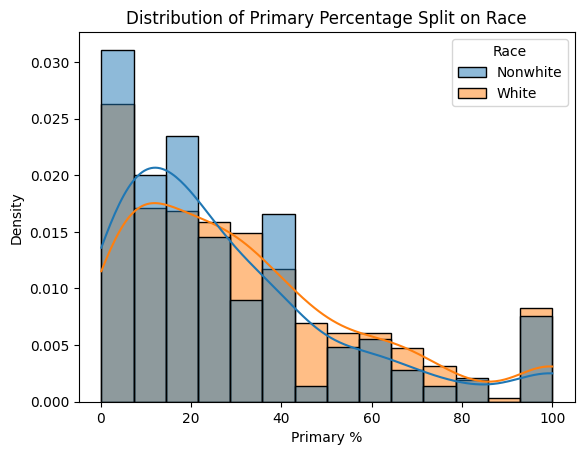

In [5]:
sns.histplot(data=dem_candidates, x='Primary %', hue='Race', stat='density', common_norm=False, kde=True)
plt.title('Distribution of Primary Percentage Split on Race')

We observe that the distribution the distribution of Primary Percentage for white democrats is slightly more skewed left than the distribution of Primary Percentage for non-white democrats. This suggests the possible answer that white democrats may be more likely to receive a higher perecentage of primary votes, which could also suggest that white democrats are more likely to win a primary. The nonwhite candidates have a higher peak density at a lower primary percentage, suggesting that nonwhite candidates recieve a smaller percentage of votes on average in the primaries.

### Categorical Visualization 1: Democrat Endorsement Count Split on Primary Election Result

Text(0.5, 1.0, 'Democrat Endorsement Count Split on Primary Election Result')

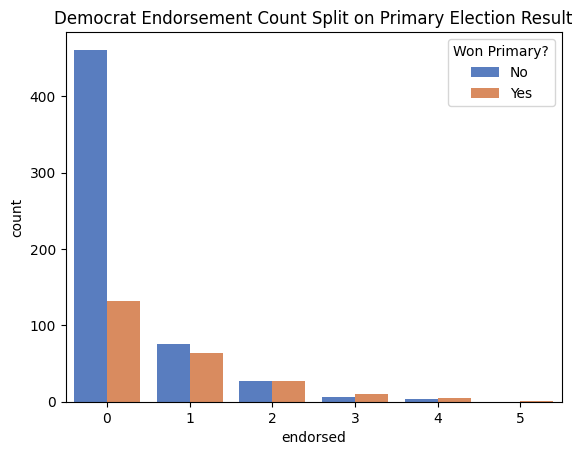

In [6]:
endorsed_dem = dem_candidates[['Candidate', 'State', 'District', 'Won Primary', 'Emily Endorsed?','Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?']]

endorsed_dem = endorsed_dem.fillna('No')

endorsed_dem.replace('No', 0, inplace=True)
endorsed_dem.replace('Yes', 1, inplace=True)

endorsed_dem['endorsed'] = endorsed_dem.iloc[:, 4:14].sum(axis=1)


sns.countplot(data=endorsed_dem, x="endorsed", hue="Won Primary", palette="muted")
plt.legend(title='Won Primary?', labels=['No', 'Yes'])
plt.title('Democrat Endorsement Count Split on Primary Election Result')

We observe that with zero endorsements the number of those who lost the primary is far lower than the number of those who won. When candidates receive one endorsement, this difference almost completely levels out. At three or more endorsements, the number of candidates who wins their election is actually greater than the number of those who lost. Although the values at this point are pretty small, so we don't have a lot of data to work off of, the difference observed at these higher numbers of endorsements imply that a greater number of endorsements means a lot when it comes to a candidates chances of winning their race. This has massive implications for our second research question, which is about whether or not different types of endorsements have an affect on the likelihood of winning the elction. As aforementioned, from the data above, we can observe that it is very likely that an endorsement has a pretty large effect on chances of winning, so this plot does a lot to motivate our question about searching to see how specific endorsements effect the chances of winning.

### Categorical Visualization 2: White/Nonewhite Candidate Count Split on Primary Election

Text(0.5, 1.0, 'White/Nonewhite Candidate Count Split on Primary Election Result')

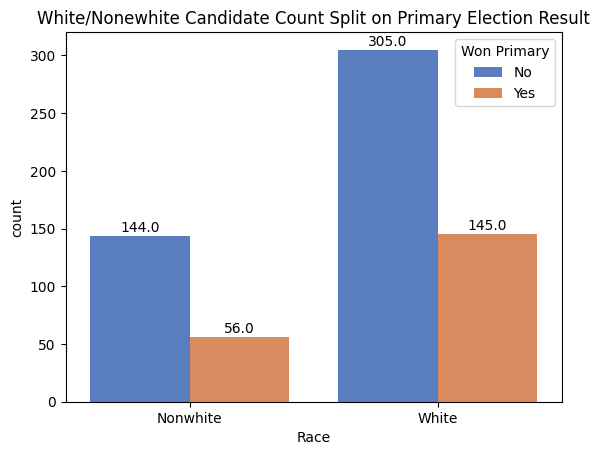

In [7]:
# Bar graph of # of candidates who white/non-white split on Primary Election Results
raceplot = sns.countplot(data=dem_candidates, x="Race", hue="Won Primary", palette="muted")
for bar in raceplot.patches:
    raceplot.annotate(bar.get_height(), (bar.get_x() + bar.get_width() / 2., bar.get_height() - 5),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('White/Nonewhite Candidate Count Split on Primary Election Result')

The proportion of white candidates who won the election is slightly higher than the proportion of nonwhite candidates who won their election, however the difference is small enough that we are inclined to consider it negligigible on first observation. As such, we can see that both the proportion of nonwhites and whites who win their primary election are about equivalent. This suggests that this is the outcome we will find from our hypothesis test checking whether race has an effect on a democrat's chances of winning.

### Categorical Visualization 3: Veteran/Nonveteran Candidate Count Split on Primary Election

Text(0.5, 1.0, 'Veteran/Nonveteran Candidate Count Split on Primary Election Result')

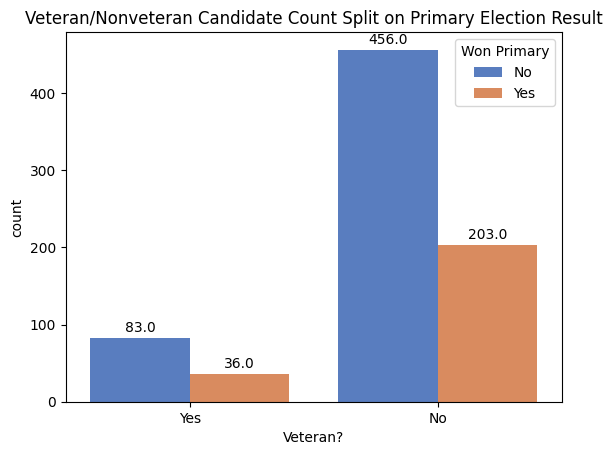

In [8]:
# Bar graph of # of candidates who veteran/non-veteran split by those who won and those who did not win primary
Vetplot = sns.countplot(data=dem_candidates, x="Veteran?", hue="Won Primary", palette="muted")
for bar in Vetplot.patches:
    Vetplot.annotate(bar.get_height(), (bar.get_x() + bar.get_width() / 2., bar.get_height() - 5),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Veteran/Nonveteran Candidate Count Split on Primary Election Result')

This bar chart is interesting as it shows the candidated based on their vet status. While there are less veteran candidates, some of them have had success in their primary elections.We see that in both vet and non-vet the proportions seem similar, this may suggest there is not a difference between being a vet and non-vet and winning the primary. The count of non-vet who won is substantial, but smaller compared to non-vets who lost. The ratios of the winers to total pop of vet and non-vet are pretty much identical and it would be interesting to see if there is change with hypothesis testing.


# Hypothesis Testing

In [9]:
dem_candidates = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/primary-candidates-2018/dem_candidates.csv')
rep_candidates = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/primary-candidates-2018/rep_candidates.csv', encoding='MacRoman')
dem_candidates.head()
dem_candidates= dem_candidates[~dem_candidates['Won Primary'].isnull()].reset_index()
rep_candidates= rep_candidates[~rep_candidates['Won Primary'].isnull()].reset_index()

In [10]:

import random
import numpy as np
dem_candidates.isnull().sum(axis=0)
race_dist = dem_candidates['Race'].value_counts()
prob_Nonwhite = race_dist['Nonwhite'] / sum(race_dist)

# Fill nan for race
for i in range(len(dem_candidates['Candidate'])):
  if pd.isnull(dem_candidates.loc[i, 'Race']):
    if random.random() < prob_Nonwhite:
      dem_candidates.loc[i, 'Race'] = 'Nonwhite'
    else:
      dem_candidates.loc[i, 'Race'] = 'White'

# Fill nan for Veteran
vet_dist = dem_candidates['Veteran?'].value_counts()
prob_vet = vet_dist['Yes'] / sum(vet_dist)
for i in range(len(dem_candidates['Candidate'])):
  if pd.isnull(dem_candidates.loc[i, 'Veteran?']):
    if random.random() < prob_vet:
      dem_candidates.loc[i, 'Veteran?'] = 'Yes'
    else:
      dem_candidates.loc[i, 'Veteran?'] = 'No'

# Fill nan for LGBT
lgbtq_dist = dem_candidates['LGBTQ?'].value_counts()
prob_lgbtq = lgbtq_dist['Yes'] / sum(lgbtq_dist)
for i in range(len(dem_candidates['Candidate'])):
  if pd.isnull(dem_candidates.loc[i, 'LGBTQ?']):
    if random.random() < prob_lgbtq:
      dem_candidates.loc[i, 'LGBTQ?'] = 'Yes'
    else:
      dem_candidates.loc[i, 'LGBTQ?'] = 'No'


Remove unopposed candidates

In [11]:
dem_candidates.isnull().sum(axis=0)

index                           0
Candidate                       0
State                           0
District                        0
Office Type                     0
Race Type                       0
Race Primary Election Date      0
Primary Status                  0
Primary Runoff Status           0
General Status                  0
Partisan Lean                   0
Primary %                      10
Won Primary                     0
Race                            0
Veteran?                        0
LGBTQ?                          0
Elected Official?              11
Self-Funder?                    0
STEM?                          11
Obama Alum?                     1
Party Support?                651
Emily Endorsed?               561
Guns Sense Candidate?         421
Biden Endorsed?               750
Warren Endorsed?              763
Sanders Endorsed?             760
Our Revolution Endorsed?      466
Justice Dems Endorsed?        590
PCCC Endorsed?                734
Indivisible En

In [12]:
excluded_districts = np.array((dem_candidates.groupby('District')['Candidate'].count().reset_index()).query("Candidate == 1")["District"])
dem_candidates = dem_candidates.query('District not in @excluded_districts')

In [13]:
rep_excluded_districts = np.array((rep_candidates.groupby('District')['Candidate'].count().reset_index()).query("Candidate == 1")["District"])
rep_candidates = rep_candidates.query('District not in @rep_excluded_districts')

In [14]:
rep_candidates.columns
dem_candidates.columns

Index(['index', 'Candidate', 'State', 'District', 'Office Type', 'Race Type',
       'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
       'General Status', 'Partisan Lean', 'Primary %', 'Won Primary', 'Race',
       'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?',
       'Obama Alum?', 'Party Support?', 'Emily Endorsed?',
       'Guns Sense Candidate?', 'Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?', 'No Labels Support?'],
      dtype='object')

In [15]:
# Hypotheses

# Hypothesis 1:
# Alternative: Veteran status is associated with primary election win rates for Democrats
# Null: Veteran status has no association with primary election win rates for Democrats

# Hypothesis 2:
# Alternative: Race has an association with election primary win rates for Democrats
# Null: Race has no association with election primary win rates for Democrats

# Hypothesis 3:
# Alternative: Being LGBTQ is associated with primary election win rates for Democrats
# Null: Being LGBTQ has no association with primary election win rates for Democrats

# Hypothesis 4:
# Alternative: Having any kind of endorsement is associated with primary election win rates for Democrats
# Null: Having any kind of endorsement has no association with primary election win rates for Democrats

# Hypothesis 5:
# Alternative: Having any sort of endorsement is associated with primary election win rate for Republicans
# Null: Having any sort of endorsement has no association with primary election win rate for Republicans

# Hypothesis 6:
# Alternative: Being a Democrat is associated with different win rates among all endorsed candidates
# Null: Being a Democrat is not associated with different win rates among endorsed candidates

In [16]:
#dem_candidates = dem_candidates.sample(n =round(len(dem_candidates) * 0.8), replace = True)
#rep_candidates = rep_candidates.sample(n =round(len(rep_candidates) * 0.8), replace = True)

In [17]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [18]:
endorsed_dem = dem_candidates[['Candidate', 'State', 'District', 'Won Primary', 'Emily Endorsed?','Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?']]
endorsed_dem = endorsed_dem.fillna('No')
endorsed_dem.replace('No', 0, inplace=True)
endorsed_dem.replace('Yes', 1, inplace=True)
endorsed_dem.iloc[:, 4:12].sum(axis=1)
endorsed_dem['endorsed'] = endorsed_dem.iloc[:, 4:14].sum(axis=1)




dem_candidates_copy = dem_candidates.copy()
dem_candidates_copy['Veteran?'].replace('Yes', 1, inplace=True)
dem_candidates_copy['Veteran?'].replace('No', 0, inplace=True)
dem_candidates_copy['Won Primary'].replace('Yes', 1, inplace=True)
dem_candidates_copy['Won Primary'].replace('No', 0, inplace=True)
dem_candidates_copy['Race'].replace('Nonwhite', 1, inplace=True)
dem_candidates_copy['Race'].replace('White', 0, inplace=True)
dem_candidates_copy['LGBTQ?'].replace('Yes', 1, inplace=True)
dem_candidates_copy['LGBTQ?'].replace('No', 0, inplace=True)

endorsed_rep = rep_candidates[['Candidate', 'Won Primary', 'Rep Party Support?',
       'Trump Endorsed?', 'Bannon Endorsed?', 'Great America Endorsed?',
       'NRA Endorsed?', 'Right to Life Endorsed?',
       'Susan B. Anthony Endorsed?', 'Club for Growth Endorsed?',
       'Koch Support?', 'House Freedom Support?', 'Tea Party Endorsed?',
       'Main Street Endorsed?', 'Chamber Endorsed?', 'No Labels Support?']]
endorsed_rep = endorsed_rep.fillna('No')
endorsed_rep.replace('No', 0, inplace=True)
endorsed_rep.replace('Yes', 1, inplace=True)
endorsed_rep['endorsed'] = endorsed_rep.iloc[:, 2:].sum(axis=1)



df_clean = dem_candidates_copy[['Candidate', 'Race', 'LGBTQ?', 'Won Primary', 'Veteran?', ]]
df_clean['endorsed?_dems'] = endorsed_dem['endorsed']
df_clean['endorsed?_dems'] = df_clean['endorsed?_dems']>1

df_clean['endorsed?_dems'].replace('True', 1, inplace=True)
df_clean['endorsed?_dems'].replace('False', 0, inplace=True)
df_clean

,Candidate,Race,LGBTQ?,Won Primary,Veteran?,endorsed?_dems
0,Anthony White (Alabama),1,0,0,1,False
1,Christopher Countryman,0,1,0,0,False
2,"Doug ""New Blue"" Smith",0,0,0,1,False
3,James C. Fields,1,0,0,1,False
4,Sue Bell Cobb,0,0,0,0,False
...,...,...,...,...,...,...
784,Talley Sergent,0,0,1,0,False
785,Janice Hagerman,0,0,0,0,False
786,Paul Davis,0,0,0,0,False
787,Richard Ojeda,1,0,1,1,True


In [19]:
df_clean_rep = pd.DataFrame()
df_clean_rep['Candidate'] = endorsed_rep['Candidate']
df_clean_rep['endorsed'] = endorsed_rep['endorsed']
df_clean_rep['Won Primary'] = endorsed_rep['Won Primary']
df_clean_rep

,Candidate,endorsed,Won Primary
0,Mike Dunleavy,0,1
1,Michael Sheldon,0,0
2,Mead Treadwell,0,0
3,Darin Colbry,0,0
4,Thomas Gordon,0,0
...,...,...,...
769,Bill Dahlin,0,0
770,Harriet Hageman,1,0
771,Sam Galeotos,1,0
772,Foster Friess,2,0


In [20]:
def difference_of_means(df, grouping_on, mean_of):
    reduced = df[[grouping_on, mean_of]]
    means_df = reduced.groupby(grouping_on).mean()
    difference = means_df.iloc[1] - means_df.iloc[0]
    return difference

In [21]:
def one_simulated_difference_of_means(df, shuffling, result_col):
  shuffled_labels = df[shuffling].sample(n=len(df), replace=False).reset_index()[shuffling]
  df['Shuffled Label'] = shuffled_labels
  difference = difference_of_means(df, result_col, 'Shuffled Label')
  return difference

In [22]:
def permutation_test(df, n, shuffling, result_col):
  difs = np.array([])
  for i in range(n):
    difs = np.append(difs, one_simulated_difference_of_means(df, shuffling, result_col))
  actual_dif = difference_of_means(df, shuffling, result_col)
  p = np.mean(np.abs(actual_dif[0]) < np.abs(difs))
  return p

# Hypothesis 1 - Alternative: Veteran status is associated with primary election win rates for Democrats

In [23]:
dom_p1 = permutation_test(df_clean, 10000, 'Veteran?', 'Won Primary')
dom_p1

0.6386

#Hyp 2 Alternative: Race has an association with election primary win rates for Democrats


In [24]:
dom_p2 = permutation_test(df_clean, 10000, 'Race', 'Won Primary')
dom_p2

0.4604

#Hypothesis 3: Alternative: Being LGBTQ is associated with primary election win rates for Democrats



In [25]:
dom_p3 = permutation_test(df_clean, 10000, 'LGBTQ?', 'Won Primary')
dom_p3

0.0533

# Hypothesis 4: Alternative: Having any kind of endorsement is associated with primary election win rates for Democrats

In [26]:
dom_p4 = permutation_test(df_clean, 10000, 'endorsed?_dems', 'Won Primary')
dom_p4

0.0

# Hypothesis 5: Alternative: Having any sort of endorsement is associated with primary election win rate for Republicans

In [27]:
df_clean_rep

,Candidate,endorsed,Won Primary
0,Mike Dunleavy,0,1
1,Michael Sheldon,0,0
2,Mead Treadwell,0,0
3,Darin Colbry,0,0
4,Thomas Gordon,0,0
...,...,...,...
769,Bill Dahlin,0,0
770,Harriet Hageman,1,0
771,Sam Galeotos,1,0
772,Foster Friess,2,0


In [28]:
dom_p5 = permutation_test(df_clean_rep, 10000, 'endorsed', 'Won Primary')
dom_p5

0.0207

In [29]:
def pwr(alpha, num_sims, df, group, result):
  p_values = np.array([])
  for i in range(num_sims):
    pv = permutation_test(df, 100, group, result)
    #print(pv)
    p_values = np.append(p_values, pv)
  power = (p_values < alpha).mean()
  return power

In [30]:
test_five_power = pwr(0.05, 200, df_clean_rep, 'endorsed', 'Won Primary')

In [31]:
test_five_power

0.96

# Hypothesis 6: Alternative: Being an endorsed Democrat is associated with higher win rates compared to endorsed Republicans

In [32]:
endorsed_rep_reduced = endorsed_rep[['Candidate', 'Won Primary', 'endorsed']]
endorsed_rep_reduced = endorsed_rep_reduced.assign(Party='rep')
endorsed_dem_reduced = endorsed_dem[['Candidate', 'Won Primary', 'endorsed']]
endorsed_dem_reduced = endorsed_dem_reduced.assign(Party='dem')
combined = pd.concat([endorsed_rep_reduced, endorsed_dem_reduced])
combined = combined[combined['endorsed'] >= 1] # Only care about endorsed candidates for whole question
combined['dem?'] = (combined['Party'] == 'dem')

In [33]:
dom_p6 = permutation_test(combined, 10000, 'dem?', 'Won Primary')
dom_p6

0.7556

In [34]:
diff_p_vals = np.array([dom_p1, dom_p2, dom_p3, dom_p4, dom_p5, dom_p6])

### Naive Thresholding

In [35]:
diff_p_vals <= .05

array([False, False, False,  True,  True, False])

### Boneferroni

In [36]:
# from lab01
def bonferroni(p_values, alpha_total):
    n = len(p_values)
    decisions = (p_values <= alpha_total/n)
    return decisions

In [37]:
bonferroni(p_values=diff_p_vals, alpha_total=.05)

array([False, False, False,  True, False, False])

###Benjamini Hochberg

In [38]:
# from lab01
def benjamini_hochberg(p_values, alpha):
    argmax_list = np.argsort(p_values)
    kan_check = []
    counter = 0
    big_p = 0
    for i in range(len(argmax_list)):
        kan_check.append(p_values[argmax_list[i]] <= (i + 1) * (alpha / len(p_values)))
        if (p_values[argmax_list[i]] <= (i + 1) * (alpha / len(p_values))):
            big_p = p_values[argmax_list[i]]
    decisions = []
    for p in p_values:
        if p <= big_p:
            decisions.append(1)
        else:
            decisions.append(0)
    return decisions

In [39]:
benjamini_hochberg(p_values=diff_p_vals, alpha=.05)

[0, 0, 0, 1, 0, 0]

# Bayesian Hierarchical Modeling

In [59]:
dem_candidates = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/primary-candidates-2018/dem_candidates.csv')
rep_candidates = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/primary-candidates-2018/rep_candidates.csv', encoding='MacRoman')

In [60]:
endorsed_dem = dem_candidates[['Candidate', 'State', 'District', 'Won Primary', 'Emily Endorsed?','Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?']]

In [61]:
endorsed_dem = endorsed_dem.fillna('No')

In [62]:
endorsed_dem.replace('No', 0, inplace=True)
endorsed_dem.replace('Yes', 1, inplace=True)

In [63]:
endorsed_dem.iloc[:, 4:12].sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
806    0
807    0
808    0
809    0
810    0
Length: 811, dtype: int64

In [64]:
endorsed_dem['endorsed'] = endorsed_dem.iloc[:, 4:14].sum(axis=1)

In [65]:
endorsed_dem

,Candidate,State,District,Won Primary,Emily Endorsed?,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,endorsed
0,Anthony White (Alabama),AL,Governor of Alabama,0,0,0,0,0,0,0,0,0,0,0,0
1,Christopher Countryman,AL,Governor of Alabama,0,0,0,0,0,0,0,0,0,0,0,0
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,0,0,0,0,0,0,0,0,0,0,0,0
3,James C. Fields,AL,Governor of Alabama,0,0,0,0,0,0,0,0,0,0,0,0
4,Sue Bell Cobb,AL,Governor of Alabama,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,Talley Sergent,WV,U.S. House West Virginia District 2,1,0,0,0,0,0,0,0,0,0,0,0
807,Janice Hagerman,WV,U.S. House West Virginia District 3,0,0,0,0,0,0,0,0,0,0,0,0
808,Paul Davis,WV,U.S. House West Virginia District 3,0,0,0,0,0,0,0,0,0,0,0,0
809,Richard Ojeda,WV,U.S. House West Virginia District 3,1,0,0,0,0,0,0,0,0,1,1,2


In [66]:
dem_candidates.groupby('Office Type').count()

,Candidate,State,District,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,Primary %,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
Office Type,,,,,,,,,,,,,,,,,,,,,
Governor,100,100,100,100,100,100,100,100,100,100,...,0,6,13,51,12,11,12,32,1,0
Representative,687,687,687,687,687,687,687,665,687,677,...,30,20,16,266,187,44,125,72,96,14
Senator,24,24,24,24,24,24,24,24,24,24,...,9,0,0,6,0,0,3,0,0,0


In [67]:
endorsements = ['Emily Endorsed?','Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?']

for e in endorsements:
  num_datapoints = np.sum(endorsed_dem[e])
  print(f'{e} has {num_datapoints} datapoints')

Emily Endorsed? has 54 datapoints
Biden Endorsed? has 10 datapoints
Warren Endorsed?  has 5 datapoints
Sanders Endorsed? has 9 datapoints
Our Revolution Endorsed? has 85 datapoints
Justice Dems Endorsed? has 50 datapoints
PCCC Endorsed? has 15 datapoints
Indivisible Endorsed? has 46 datapoints
WFP Endorsed? has 30 datapoints
VoteVets Endorsed? has 28 datapoints


We initially chose to base our prior on Endorsements that have been given out to at least 45 people, but ended up using a uniform prior instead, since we realized we cannot generalize a distribution better for the entire set than the uniform would.

In [68]:
# big_endorsements = endorsed_dem[['Emily Endorsed?', 'Our Revolution Endorsed?', 'Justice Dems Endorsed?', 'Indivisible Endorsed?', 'Won Primary']]
# only_endorsed = big_endorsements.loc[big_endorsements.iloc[:,:4].sum(axis=1) > 0, :]
# mean_large_endorsements = np.mean(only_endorsed['Won Primary'])
# variance_large_endorsements = np.var(only_endorsed['Won Primary'])
# print('We want the mean of our prior to be ', mean_large_endorsements)
# print('We want the variance of our prior to be ', variance_large_endorsements)

In [69]:
# mu = mean_large_endorsements
# var = variance_large_endorsements
# b = (mu * (1-mu)/var - 1) / (mu / (1-mu) + 1)
# a = mu * b / (1- mu)
# print(a, b)

In [70]:
winners = []
for e in endorsements:
  num_winners = np.sum(endorsed_dem[endorsed_dem['Won Primary'] == 1][e])
  winners.append(num_winners)
winners

[39, 10, 5, 5, 27, 16, 10, 30, 15, 16]

In [71]:
num_people_each_endorse = []
for e in endorsements:
  num_datapoints = np.sum(endorsed_dem[e])
  num_people_each_endorse.append(num_datapoints)

In [72]:
import pymc as pm
with pm.Model() as model:
    theta = pm.Uniform('theta', lower=0, upper=1, shape=len(endorsements))
    X = pm.Binomial('X', n=num_people_each_endorse, p=theta, observed=winners)
    trace = pm.sample(500, chains=4, tune=1000, target_accept=0.95, return_inferencedata=False, progressbar=True)


In [54]:
trace['theta']

array([[0.70996945, 0.98011589, 0.71894317, ..., 0.63319678, 0.44007227,
        0.59015657],
       [0.74408384, 0.99737119, 0.73997989, ..., 0.61671639, 0.43176525,
        0.39690834],
       [0.71892422, 0.98532258, 0.91948523, ..., 0.76351386, 0.50394832,
        0.62705708],
       ...,
       [0.66915987, 0.97807661, 0.9503921 , ..., 0.65565587, 0.48303525,
        0.64802995],
       [0.70007553, 0.75204134, 0.99465443, ..., 0.47114918, 0.43499211,
        0.57010318],
       [0.60513747, 0.97878258, 0.99578385, ..., 0.62952114, 0.40831697,
        0.55076277]])

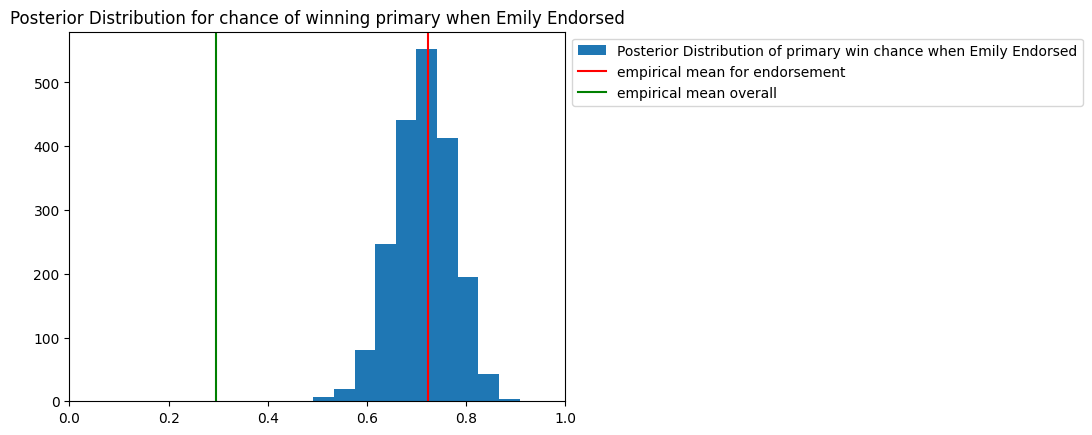

empirical mean of this endorsement:  0.7222222222222222
empirical mean of all candidates:  0.29469790382244143
posterior mean: 0.7134939001057644
posterior variance:  0.00353375492842982


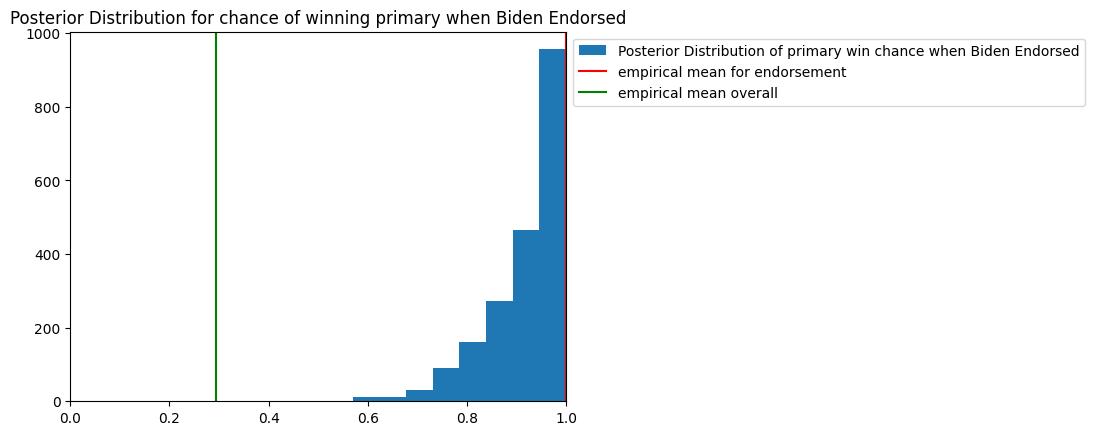

empirical mean of this endorsement:  1.0
empirical mean of all candidates:  0.29469790382244143
posterior mean: 0.9172779285943571
posterior variance:  0.006060618717038328


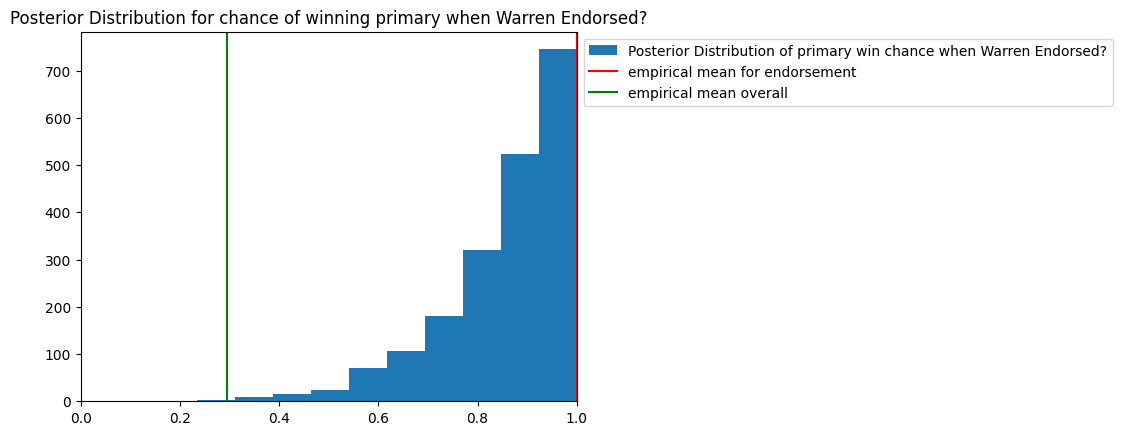

empirical mean of this endorsement:  1.0
empirical mean of all candidates:  0.29469790382244143
posterior mean: 0.8557278842130657
posterior variance:  0.01568058714006254


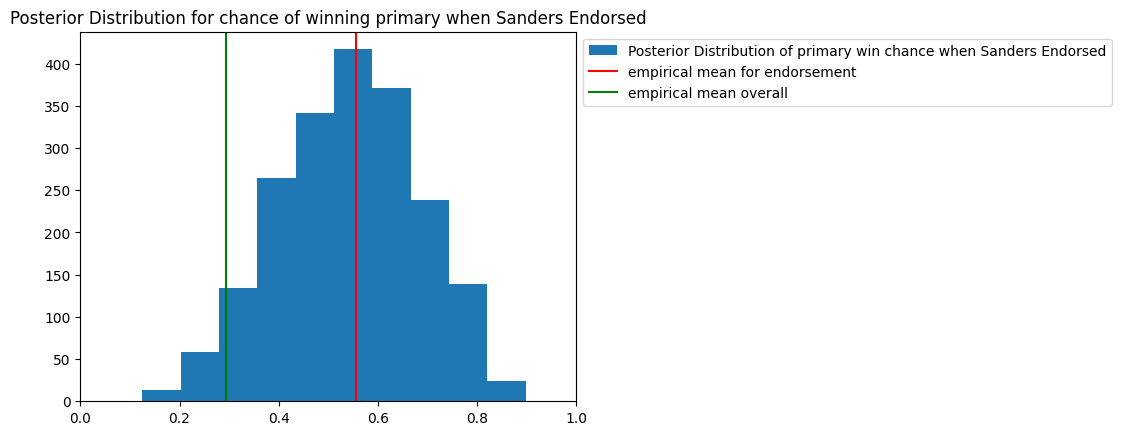

empirical mean of this endorsement:  0.5555555555555556
empirical mean of all candidates:  0.29469790382244143
posterior mean: 0.5423357408533898
posterior variance:  0.020055143400932892


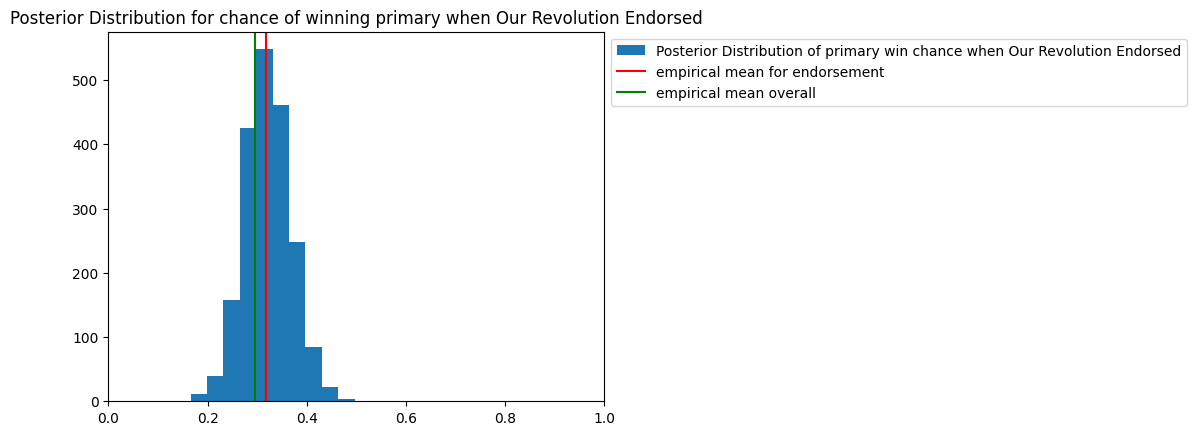

empirical mean of this endorsement:  0.3176470588235294
empirical mean of all candidates:  0.29469790382244143
posterior mean: 0.32172326229698994
posterior variance:  0.0022141752749107475


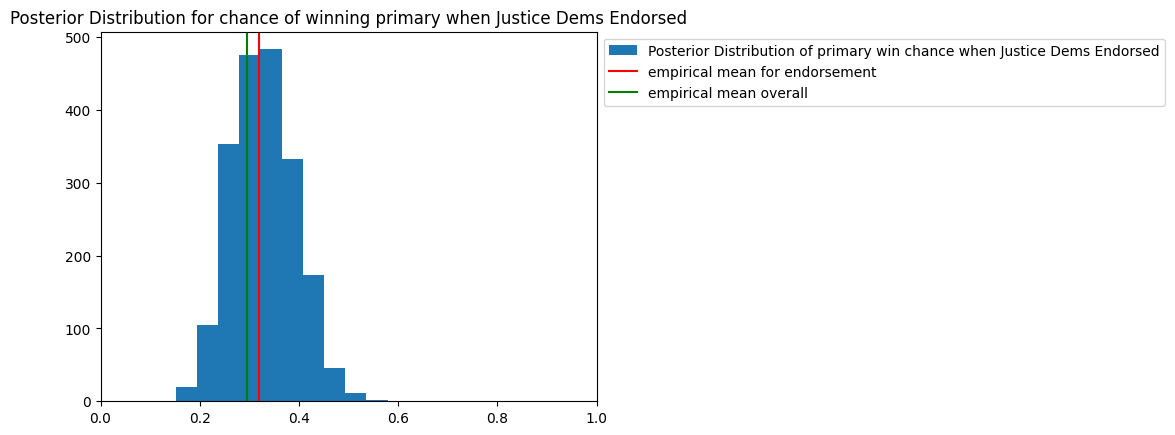

empirical mean of this endorsement:  0.32
empirical mean of all candidates:  0.29469790382244143
posterior mean: 0.32825210546925365
posterior variance:  0.004011629216597586


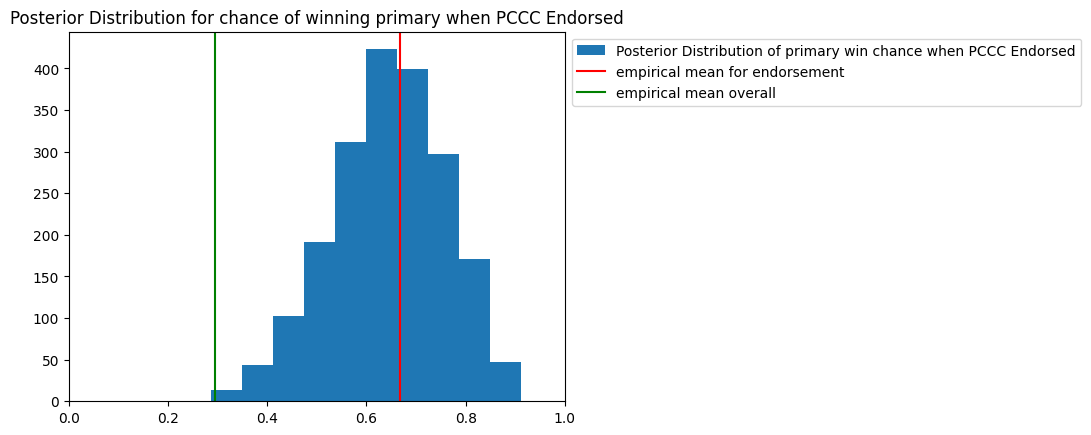

empirical mean of this endorsement:  0.6666666666666666
empirical mean of all candidates:  0.29469790382244143
posterior mean: 0.6451690728331078
posterior variance:  0.013032975403193103


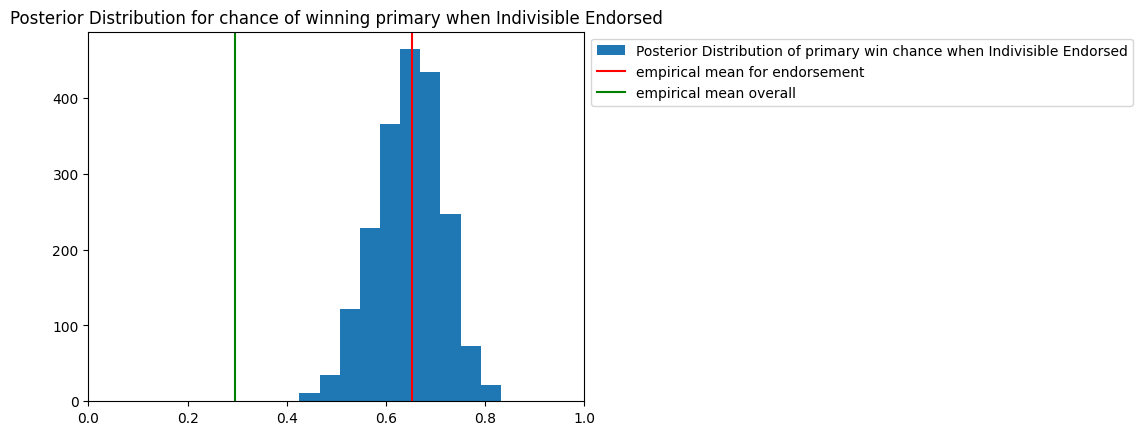

empirical mean of this endorsement:  0.6521739130434783
empirical mean of all candidates:  0.29469790382244143
posterior mean: 0.6456764495515236
posterior variance:  0.004497314029666626


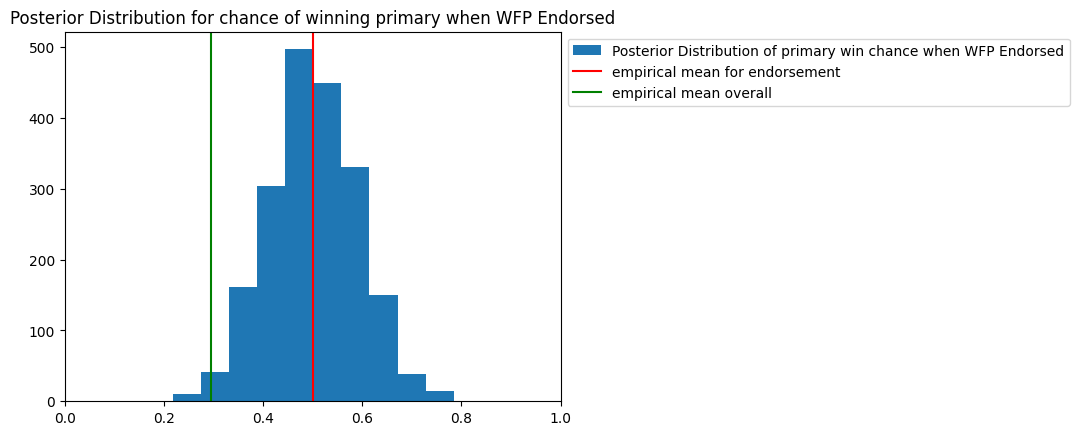

empirical mean of this endorsement:  0.5
empirical mean of all candidates:  0.29469790382244143
posterior mean: 0.5014060572747243
posterior variance:  0.007976607183481898


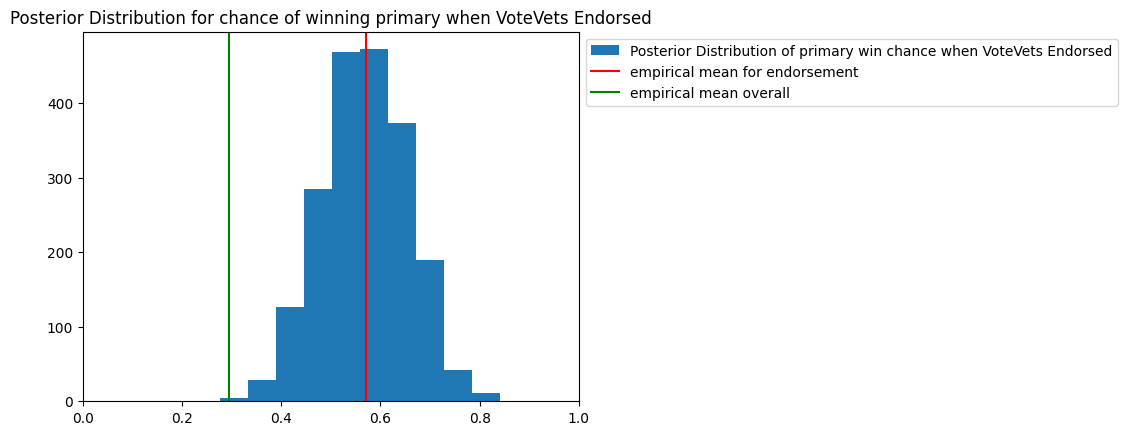

empirical mean of this endorsement:  0.5714285714285714
empirical mean of all candidates:  0.29469790382244143
posterior mean: 0.5687408634352271
posterior variance:  0.007384009000258543


In [73]:
import matplotlib.pyplot as plt
for i in range(len(endorsements)):
  plt.hist(trace['theta'][:, i], label=(f'Posterior Distribution of primary win chance when {endorsements[i][:len(endorsements[i])-1]}'))
  plt.title(f'Posterior Distribution for chance of winning primary when {endorsements[i][:len(endorsements[i])-1]}')
  plt.axvline(x=np.mean(endorsed_dem[endorsed_dem[endorsements[i]] == 1]['Won Primary']), color='r', label='empirical mean for endorsement')
  plt.axvline(x=np.mean(endorsed_dem['Won Primary']), color='g', label='empirical mean overall')
  plt.xlim([0, 1])
  plt.legend(bbox_to_anchor=(1, 1))
  plt.show()
  print('empirical mean of this endorsement: ', np.mean(endorsed_dem[endorsed_dem[endorsements[i]] == 1]['Won Primary']))
  print('empirical mean of all candidates: ', np.mean(endorsed_dem['Won Primary']))
  print('posterior mean:', np.mean(trace['theta'][:, i]))
  print('posterior variance: ', np.var(trace['theta'][:, i]))

In [56]:
endorsers = ["Emily's List", 'Joe Biden', 'Elizabeth Warren', 'Bernie Sanders', 'Our Revolution', 'Justice Dems', 'PCCC', 'Indivisible', 'WFP', 'VoteVets']

for i in range(len(endorsements)):
    mu = np.round(np.mean(trace['theta'][:, i]), 3)
    sd = np.round(np.std(trace['theta'][:, i]), 3)
    print(f'For candidates endorsed by {endorsers[i]}, the posterior mean is {mu} with a standard deviation of {sd}. This implies that most values are between {np.round(mu - sd, 3)} and {np.round(mu + sd, 3)}, but not outside of the bounds of (0,1)')

For candidates endorsed by Emily's List, the posterior mean is 0.711 with a standard deviation of 0.059. This implies that most values are between 0.652 and 0.77, but not outside of the bounds of (0,1)
For candidates endorsed by Joe Biden, the posterior mean is 0.917 with a standard deviation of 0.076. This implies that most values are between 0.841 and 0.993, but not outside of the bounds of (0,1)
For candidates endorsed by Elizabeth Warren, the posterior mean is 0.854 with a standard deviation of 0.124. This implies that most values are between 0.73 and 0.978, but not outside of the bounds of (0,1)
For candidates endorsed by Bernie Sanders, the posterior mean is 0.546 with a standard deviation of 0.142. This implies that most values are between 0.404 and 0.688, but not outside of the bounds of (0,1)
For candidates endorsed by Our Revolution, the posterior mean is 0.324 with a standard deviation of 0.049. This implies that most values are between 0.275 and 0.373, but not outside of th